# Lab 5: The simple pendulum

- Another common example of a mechanical system which exhibits
  oscillatory motion is the ``simple'' pendulum.
- Idealized system consisting of a particle or ``bob'' of mass $m$
  attached to the lower end of a rigid rod of length $L$ and
  negligible mass.  The upper end of the rod pivots without friction.
- The pendulum swings in a vertical plane.

- The bob is constrained to move along an arc of a circle of
  radius $L$.
- The bob's position is specified by $L$ and the angle $\theta$.
- Linear velocity and acceleration of the bob as measured along
  the arc are given by
\begin{eqnarray*}
v &=& L\frac{d \theta}{dt}\\
a & = & L \frac{d^2 \theta}{dt^2}
\end{eqnarray*}
- Two forces act on the bob:  the force $mg$ vertically downward
  and the force of the rod.
- The rod does not exert a force along the arc, so we need to
  consider only the component of $m {\rm \bf g}$ along the arc, or $mg \sin
  \theta$. The equation of motion is
\begin{eqnarray*}
mL \frac{d^2 \theta}{dt^2} &=& -mg \sin \theta 
\end{eqnarray*}

- The pendulum is an example of a *non-linear* equation since
  $\sin \theta$ appears rather than $\theta$.
- Most non-linear equations do not have analytical solutions.
- However, if the pendulum has small amplitude oscillations, then
  $\sin \theta \approx \theta$, and the equation of motion reduces to
\begin{equation*}
\frac{d^2 \theta}{dt^2} \approx -\frac{g}{L} \theta
\end{equation*}
- Note that this equation is identical in form to the mass on a
  spring, i.e., 
\begin{equation*}
\frac{d^2 x}{dt^2} \approx -\omega_0^2 x
\end{equation*}
- We immediately conclude that
\begin{equation*}
T = 2 \pi \sqrt{L/g}
\end{equation*}

- One way to understand the motion of a pendulum with large
  oscillations is to solve the non-linear equation of motion
  numerically.
- A numerical solution must be consistent with energy
  conservation!
- The potential energy is found by noting that if the bob is deflected by
  angle $\theta$, the bob is raised by the distance $h = L -L \cos
  \theta$. Thus,
\begin{equation*}
U = mgh = mgL(1 - \cos \theta)
\end{equation*}
where the zero potential energy corresponds to $\theta = 0$.
- The kinetic energy is
\begin{equation*}
\frac{1}{2} m v^2 = \frac{1}{2} m L^2 \left(\frac{d \theta}{d
    t}\right )^ 2
\end{equation*}
- The total energy is
\begin{equation*}
E = \frac{1}{2} m L^2 \left(\frac{d \theta}{d
    t}\right )^ 2 +  mgL(1 - \cos \theta)
\end{equation*}

## Exercise 1

1. Write a python program to simulate small amplitude oscillations of the simple pendulum.  Since $\sin \theta \approx \theta$, the problem is identical to the mass on a spring problem.  In this case, $x \rightarrow  \theta$, $v \rightarrow \omega = d \theta/dt$ and $k/m \rightarrow g/L$.  In this context, $\omega$ is the angular velocity of the pendulum bob.  What are the units of $g/L$?  Choose $g/L =9$ and the initial conditions $\theta^0 = 0.1$, $\omega^0 = 0$ and determine the period.

2. Modify your program to simulate large(r) amplitude oscillations.  Set $g/L =9$ and choose $\Delta t$ so that the numerical method generates a stable solution.  Check the stability of the solution by monitoring the total energy and ensure that it does not drift (too much) from its initial value.

3. Set $\omega^0 = 0$ and make plots of $\theta(t)$ and $\omega(t)$ for the initial conditions $\theta^0 = [0.1, 0.2, 0.4, 0.8, 1.0]$. (Remember that $\theta$ is measured in radians and is restricted to $|\theta| \lt \pi/2$.) Describe the qualitative behavior of $\theta$ and $\omega$.  What is the period $T$ and amplitude $\theta_{max}$ in each case?  Plot $T$ vs. $\theta_{max}$ and discuss the qualitative dependence of the period on the amplitude.  How  do your results for $T$ compare to the linear and non-linear cases, e.g., which period is larger?  Explain the relative values of $T$ in physical terms.


Text(0.5, 0, 'Initial Thetas')

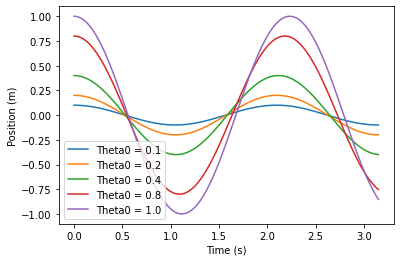

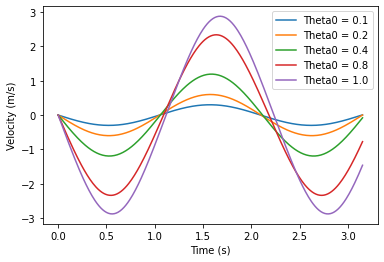

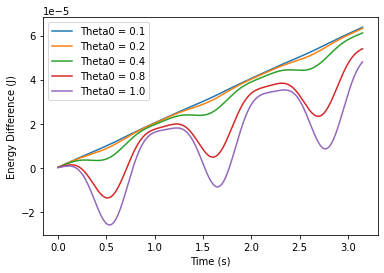

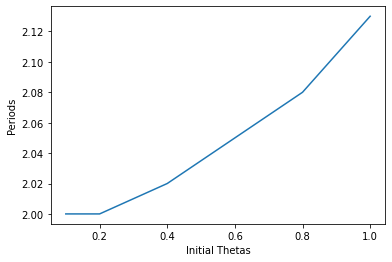

In [ ]:
# The simple pendulum.
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scpy
#---------------------------
def omegadot(theta):
    return -goverL*np.sin(theta);
#---------------------------
def approxomegadot(theta):
    return -goverL*theta;
#---------------------------
def euler_improved_pendulum(time,theta0,omega0,goverL,dt):
    #theta0 is theta(time=0), initial condition
    #dt is the time step 
    theta = []                          #initialize an array for the output
    omega = []

    #Calculating energy per unit mass length squared (i.e. E/(m*L^2))
    timediff = []
    E0 = goverL*(1-np.cos(theta0)) + (1/2)*(omega0**2) 
    inittheta = theta0

    for n in range(0,len(time)): 
        theta.append(theta0)
        omega.append(omega0)
    
        omegas = omega0 + omegadot(theta0)*dt
        thetas = theta0 + omega0*dt

        omegap = omega0 + 0.5*(omegadot(theta0) + omegadot(thetas))*dt
        theta0 = theta0 + 0.5*(omegas+omega0)*dt
        omega0 = omegap

        E_p_m = goverL*(1-np.cos(theta0)) + (1/2)*(omega0**2) 
        delta_n = (E_p_m - E0)/E0
        timediff.append(delta_n)
 
    period = time[np.argmax(theta[10:])] - time[0]

    return theta, omega, timediff, period

goverL = 9 #per 1/sec^2 or rad/sec^2
period = 2*np.pi*np.sqrt(1/goverL)
theta0 = np.array([0.1,0.2,0.4,0.8,1.0]) 
omega0 = 0
dt = 0.01
time = np.arange(0, 1.5*period + dt, dt)
[theta1, omega1, timediff1, period1] = euler_improved_pendulum(time,theta0[0],omega0,goverL,dt);
[theta2, omega2, timediff2, period2] = euler_improved_pendulum(time,theta0[1],omega0,goverL,dt);
[theta3, omega3, timediff3, period3] = euler_improved_pendulum(time,theta0[2],omega0,goverL,dt);
[theta4, omega4, timediff4, period4] = euler_improved_pendulum(time,theta0[3],omega0,goverL,dt);
[theta5, omega5, timediff5, period5] = euler_improved_pendulum(time,theta0[4],omega0,goverL,dt);

periods = [period1, period2, period3, period4, period5]

#Plots the Position vs Time 
plt.figure(1)
plt.plot(time,theta1, label='Theta0 = 0.1')
plt.plot(time,theta2, label='Theta0 = 0.2')
plt.plot(time,theta3, label='Theta0 = 0.4')
plt.plot(time,theta4, label='Theta0 = 0.8')
plt.plot(time,theta5, label='Theta0 = 1.0')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
#Plots the Velocity vs Time
plt.figure(2)
plt.plot(time,omega1, label='Theta0 = 0.1')
plt.plot(time,omega2, label='Theta0 = 0.2')
plt.plot(time,omega3, label='Theta0 = 0.4')
plt.plot(time,omega4, label='Theta0 = 0.8')
plt.plot(time,omega5, label='Theta0 = 1.0')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
#Plots the Energy Loss vs Time
plt.figure(3)
plt.plot(time,timediff1, label='Theta0 = 0.1')
plt.plot(time,timediff2, label='Theta0 = 0.2')
plt.plot(time,timediff3, label='Theta0 = 0.4')
plt.plot(time,timediff4, label='Theta0 = 0.8')
plt.plot(time,timediff5, label='Theta0 = 1.0')
plt.xlabel('Time (s)')
plt.ylabel('Energy Difference (J)')
plt.legend()
#Plots the Period vs Theta_max (Initial Theta)
plt.figure(4)
plt.plot(theta0, periods)
plt.ylabel('Periods')
plt.xlabel('Initial Thetas')

**Problem 3:** 
Generally $\theta$ and $\omega$ are slowing down as time goes on. Technically the period should be the same throughout since the period only relies on the length of the pendulum, however, as you can see on the graphs as the initial theta increases the period slowly increases with time.

I'm not sure why I got the same period for the first two amplitudes. The rest of the amplitudes followed what it should but not the first.

## Exercise 2

The state of motion of a one-dimensional oscillator (e.g., mass on a spring) is completely specified as a function of time if the two quantities $x(t)$ and $v(t)$ are given.  These quantities may be considered to be the coordinates of a point in a two-dimensional space, called *phase space*.   As the time increases, the point $[x,y]$ moves along a trajectory in phase space.

4. Obtain several phase space (i.e., $\theta(t)$, $\omega(t)$) plots for the simple pendulum for different values of total energy.  Are the phase space paths closed?  Does the shape of the path depend on the total energy?

Text(0.5, 0, 'Position (m)')

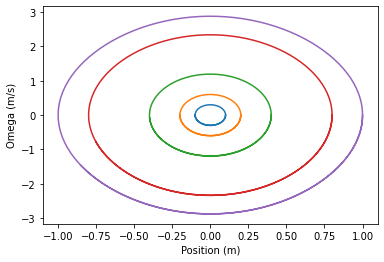

In [ ]:
plt.figure(1)
plt.plot(theta1, omega1, label='Theta0 = 0.1')
plt.plot(theta2, omega2, label='Theta0 = 0.2')
plt.plot(theta3, omega3, label='Theta0 = 0.4')
plt.plot(theta4, omega4, label='Theta0 = 0.8')
plt.plot(theta5, omega5, label='Theta0 = 1.0')
plt.ylabel('Omega (m/s)')
plt.xlabel('Position (m)')

## Exercise 3

5. Repeat Exercise 1 using *scipy* modules to solve the ODE.  Read the documentation on the scipy.integrate class and comment the code below.  Calculate the total energy as a function of time (as before) and compare with your second order method.  

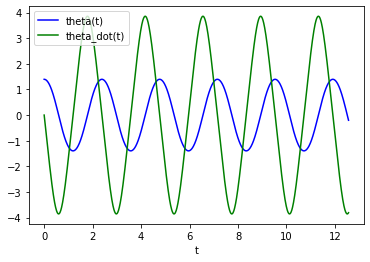

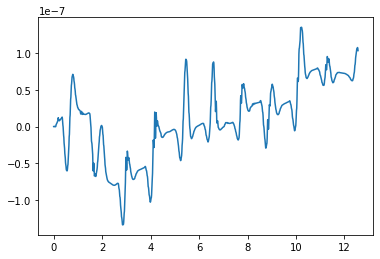

In [ ]:
from scipy.integrate import odeint

#Treating the pendulum ODE as a funciton
def pendulum(y, t, b, c):
    [theta, theta_dot] = y
    dydt = [theta_dot, b - c*np.sin(theta)]
    return dydt

#Initialization of theta0, omega0 and the final time
theta_0 = 80*np.pi/180.
theta_dot_0 = 0.0
tfinal = 4*np.pi

#Initialize list to hold the solution and the time range
y0 = [theta_0,theta_dot_0]
tm = np.arange(0,tfinal,dt)

#Set the initial Energy over mass times length squared
E0_over_mL2 = goverL*(1-np.cos(theta_0)) + (1/2)*(theta_dot_0**2)

#Called the odeint function from scipi using the pendulum function above
sol = odeint(pendulum, y0, tm, args=(0,goverL))

#Printing out the plots for the solutions
plt.figure(1)
plt.plot(tm, sol[:, 0], 'b', label='theta(t)')
plt.plot(tm, sol[:, 1], 'g', label='theta_dot(t)')
plt.legend(loc='best')
plt.xlabel('t')

#Calculating the Energy over mass times length squared difference from initial
E_over_mL2 = 0.5*sol[:,1]**2 + goverL*(1-np.cos(sol[:,0]))
np.asarray(E_over_mL2)
Delta_n = (E_over_mL2-E0_over_mL2) / E0_over_mL2

#Printing out the plots for the difference in energy from initial compared to time
plt.figure(2)
plt.plot(tm,Delta_n)
